In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [2]:
sns.set_style("darkgrid")

In [3]:
def _normalize(df):
    df = df.melt(
        id_vars=["areaName", "Borough", "areaType"], 
        value_vars=list(df.columns[3:]),
        var_name='date', 
        value_name='value',
    )
    df["date"] = pd.to_datetime(df["date"])
    return df

In [4]:
def get_median_asking_rent():
    df = pd.read_csv('RentData051022/medianAskingRent_All.csv')
    return _normalize(df)

In [5]:
def get_discount_share():
    df =  pd.read_csv('RentData051022/discountShare_All.csv')
    return _normalize(df)

In [6]:
def get_rental_inventory():
    df = pd.read_csv('RentData051022/rentalInventory_All.csv')
    return _normalize(df)

In [7]:
def get_rental_index():
    df = pd.read_csv('RentData051022/rentalIndex_All.csv')
    df = df.rename(columns={"Month": "date"})
    df["date"] = pd.to_datetime(df["date"])
    return df

### Rental_inventory Graphs

In [11]:
rental_inventory = get_rental_inventory()
rental_inventory.head(10)

,areaName,Borough,areaType,date,value
0,All Downtown,Manhattan,submarket,2010-01-01,4268
1,All Midtown,Manhattan,submarket,2010-01-01,3065
2,All Upper East Side,Manhattan,submarket,2010-01-01,2549
3,All Upper Manhattan,Manhattan,submarket,2010-01-01,848
4,All Upper West Side,Manhattan,submarket,2010-01-01,2162
5,Astoria,Queens,neighborhood,2010-01-01,102
6,Auburndale,Queens,neighborhood,2010-01-01,2
7,Bath Beach,Brooklyn,neighborhood,2010-01-01,2
8,Battery Park City,Manhattan,neighborhood,2010-01-01,213
9,Bay Ridge,Brooklyn,neighborhood,2010-01-01,47


In [17]:
rental_inventory.areaType.unique()

array(['submarket', 'neighborhood', 'borough', 'city'], dtype=object)

#### 1) Total Inventory by Borough

In [52]:
df = rental_inventory.loc[rental_inventory["areaType"] == 'borough']
print(df.head)

<bound method NDFrame.head of             areaName        Borough areaType       date  value
22             Bronx          Bronx  borough 2010-01-01    165
24          Brooklyn       Brooklyn  borough 2010-01-01   1820
108        Manhattan      Manhattan  borough 2010-01-01  12922
150           Queens         Queens  borough 2010-01-01    562
172    Staten Island  Staten Island  borough 2010-01-01      7
...              ...            ...      ...        ...    ...
28930          Bronx          Bronx  borough 2022-03-01   1005
28932       Brooklyn       Brooklyn  borough 2022-03-01   9839
29016      Manhattan      Manhattan  borough 2022-03-01  11818
29058         Queens         Queens  borough 2022-03-01   4415
29080  Staten Island  Staten Island  borough 2022-03-01     81

[735 rows x 5 columns]>


<AxesSubplot:xlabel='date', ylabel='value'>

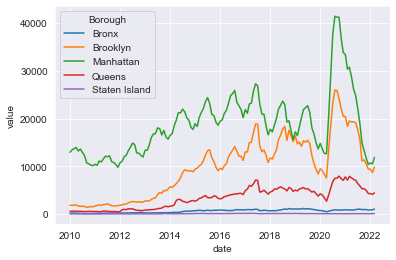

In [31]:
sns.lineplot(data=df, x='date', y='value', hue='Borough')

#### 2) Inventory by submarkets of Manhattan

<AxesSubplot:xlabel='date', ylabel='value'>

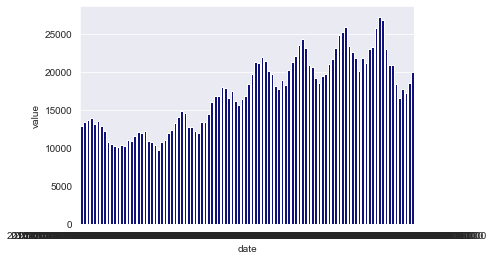

In [45]:
bar_1 = sns.barplot(x="date",  y="value", data=df[df['Borough'] == 'Manhattan'][:100], color='darkblue')
bar_2 = sns.barplot(x="date",  y="value", data=df[df['Borough'] == 'Brooklyn'][:100], color='darkblue')

In [46]:
median_asking = get_median_asking_rent()
print(median_asking.head())

              areaName    Borough   areaType       date   value
0         All Downtown  Manhattan  submarket 2010-01-01  3200.0
1          All Midtown  Manhattan  submarket 2010-01-01  2875.0
2  All Upper East Side  Manhattan  submarket 2010-01-01  2450.0
3  All Upper Manhattan  Manhattan  submarket 2010-01-01  1836.0
4  All Upper West Side  Manhattan  submarket 2010-01-01  2895.0


In [53]:
df_rent = median_asking.loc[median_asking.areaType == 'borough']
df_rent


,areaName,Borough,areaType,date,value
22,Bronx,Bronx,borough,2010-01-01,1600.0
24,Brooklyn,Brooklyn,borough,2010-01-01,2200.0
108,Manhattan,Manhattan,borough,2010-01-01,2800.0
150,Queens,Queens,borough,2010-01-01,1655.0
172,Staten Island,Staten Island,borough,2010-01-01,NaN
...,...,...,...,...,...
28930,Bronx,Bronx,borough,2022-03-01,2200.0
28932,Brooklyn,Brooklyn,borough,2022-03-01,2850.0
29016,Manhattan,Manhattan,borough,2022-03-01,3870.0
29058,Queens,Queens,borough,2022-03-01,2325.0


In [56]:
to_plot_df = df_rent.pivot_table(index="date", columns="Borough", values="value")

<AxesSubplot:xlabel='date'>

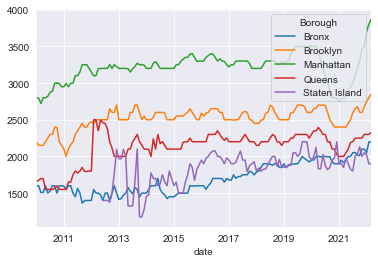

In [57]:
to_plot_df.plot()

In [81]:
mdf = get_median_asking_rent()
mdf = mdf.loc[mdf["areaType"] == "borough"]
mdf = mdf.drop(columns=["areaType", "areaName"])
mdf = mdf.set_index(["Borough", "date"])
mdf = mdf.rename(columns={"value": "rent"})

In [82]:
idf = get_rental_inventory()
idf = idf.loc[idf["areaType"] == "borough"]
idf = idf.drop(columns=["areaType", "areaName"])
idf = idf.set_index(["Borough", "date"])
idf = idf.rename(columns={"value": "inventory"})

In [83]:
mdf

,,rent
Borough,date,
Bronx,2010-01-01,1600.0
Brooklyn,2010-01-01,2200.0
Manhattan,2010-01-01,2800.0
Queens,2010-01-01,1655.0
Staten Island,2010-01-01,NaN
...,...,...
Bronx,2022-03-01,2200.0
Brooklyn,2022-03-01,2850.0
Manhattan,2022-03-01,3870.0


In [84]:
idf

,,inventory
Borough,date,
Bronx,2010-01-01,165
Brooklyn,2010-01-01,1820
Manhattan,2010-01-01,12922
Queens,2010-01-01,562
Staten Island,2010-01-01,7
...,...,...
Bronx,2022-03-01,1005
Brooklyn,2022-03-01,9839
Manhattan,2022-03-01,11818


In [101]:
df = mdf.join(idf).sort_index()
df["rent/inventory"] = df["rent"] / df["inventory"]

In [102]:
df

rent  inventory  rent/inventory
Borough       date                                         
Bronx         2010-01-01  1600.0        165        9.696970
              2010-02-01  1600.0        183        8.743169
              2010-03-01  1508.0        186        8.107527
              2010-04-01  1508.0        154        9.792208
              2010-05-01  1600.0        138       11.594203
...                          ...        ...             ...
Staten Island 2021-11-01  2000.0         55       36.363636
              2021-12-01  2050.0         51       40.196078
              2022-01-01  2025.0         42       48.214286
              2022-02-01  1900.0         59       32.203390
              2022-03-01  1895.0         81       23.395062

[735 rows x 3 columns]

<AxesSubplot:xlabel='date'>

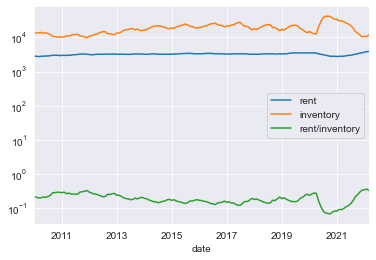

In [106]:
df.loc["Manhattan"].plot(logy=True)